In [69]:
import numpy as np

# Parameters
num_players = 4          # Total players
num_actions = 3          # Each player has 3 possible actions
num_rounds = 500         # Number of repeated rounds
eta = 0.1                # Learning rate for Hedge algorithm

# Creation of general sum game
# This is a 5D tensor: (a1, a2, a3, a4, player_idx)
# Each entry gives the payoff for a player given all 4 players' actions
payoff_tensor = np.random.rand(num_actions, num_actions, num_actions, num_actions, num_players)

# Initialize weights
# weights[i][a] is the current weight of player i on action a
weights = np.ones((num_players, num_actions))

# Track Metrics
history_actions = []
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

# Main
for t in range(num_rounds):
    # Compute mixed strategies (convert weights to probability distributions)
    probs = weights / weights.sum(axis=1, keepdims=True)

    # Sample actions for each player
    actions = np.array([
        np.random.choice(num_actions, p=probs[i])
        for i in range(num_players)
    ])
    history_actions.append(actions)

    # Determine payoffs based on the joint action
    rewards = payoff_tensor[tuple(actions)]

    # For each player: update Hedge weights and track regret
    for i in range(num_players):
        # Estimate counterfactual payoffs for all possible actions
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            counterfactual_action = actions.copy()
            counterfactual_action[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(counterfactual_action)][i]

        # Calculate regret: best payoff - actual payoff
        best_response = np.max(counterfactual_payoffs)
        actual = rewards[i]
        regret = best_response - actual

        # Log
        history_rewards[i, t] = actual
        history_regrets[i, t] = regret

        # Hedge update
        weights[i] *= np.exp(eta * counterfactual_payoffs)

# Output results
print("Final average regrets per player:")
print(history_regrets.mean(axis=1))

print("Final average payoffs per player:")
print(history_rewards.mean(axis=1))

print("Final action distribution weights:")
print(weights / weights.sum(axis=1, keepdims=True))


Final average regrets per player:
[0.19068499 0.19130962 0.09575053 0.23171181]
Final average payoffs per player:
[0.60013273 0.55019063 0.55522821 0.54090672]
Final action distribution weights:
[[8.65513363e-06 2.14824695e-02 9.78508875e-01]
 [9.88444915e-01 2.29091269e-03 9.26417206e-03]
 [5.24114513e-01 4.75885341e-01 1.45727990e-07]
 [2.64384562e-01 2.01291565e-04 7.35414147e-01]]


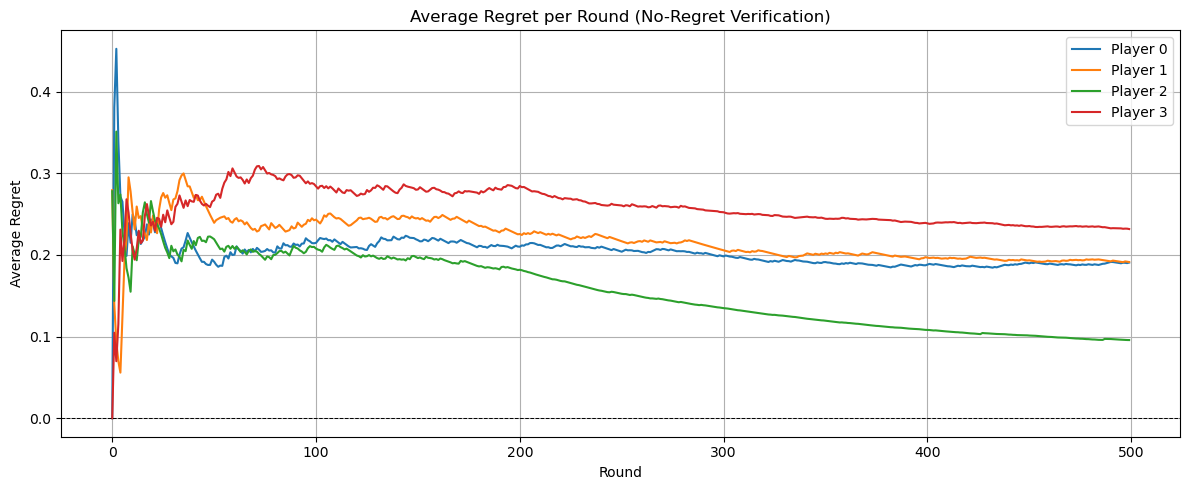

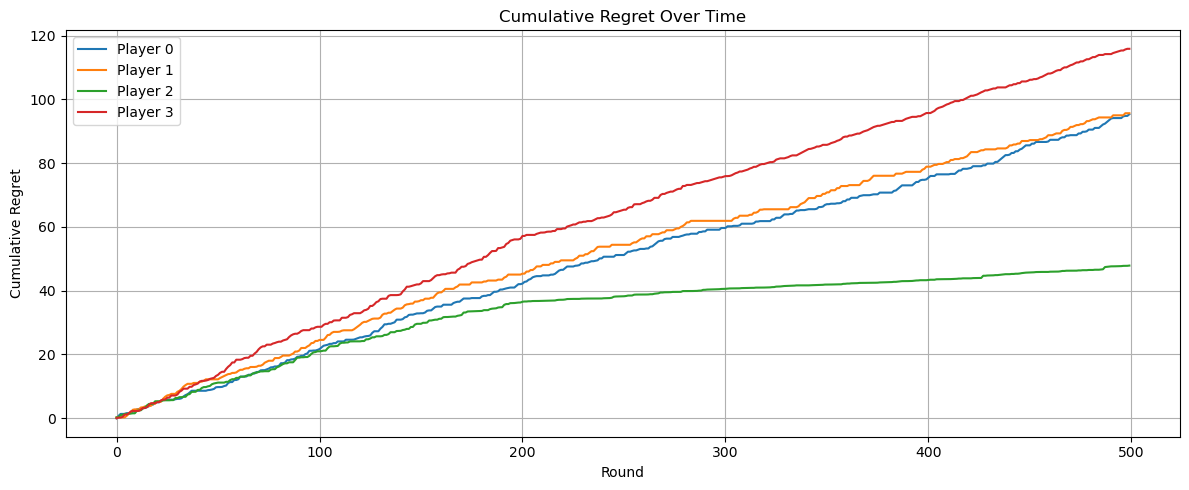

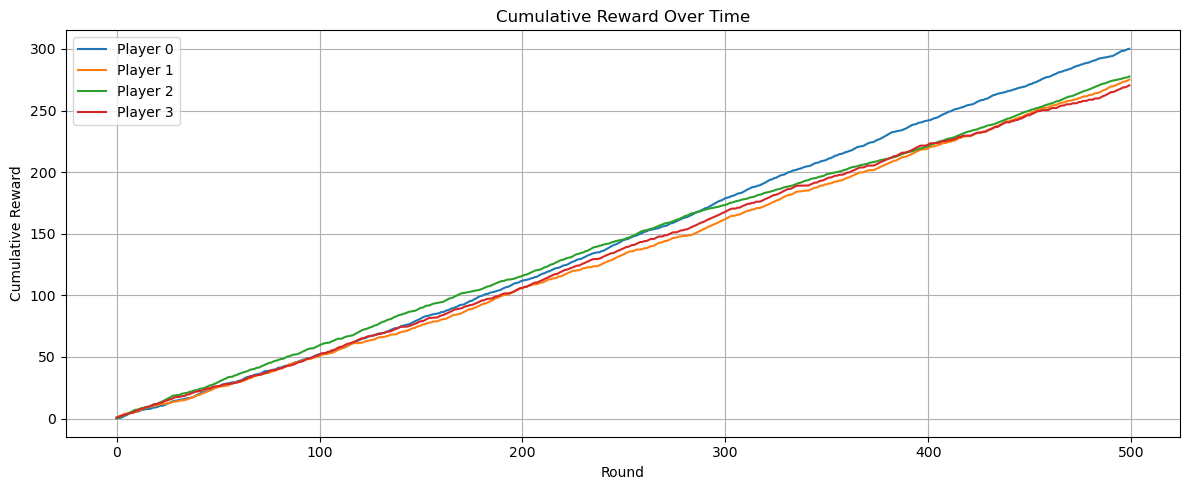

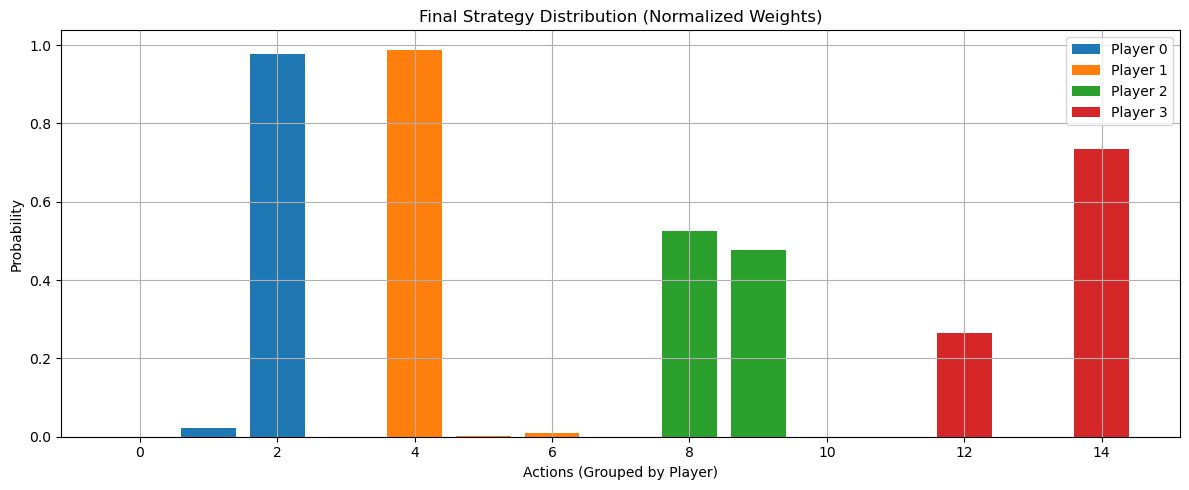

In [70]:
import matplotlib.pyplot as plt

# Plot average regret per round to verify no-regret behavior
plt.figure(figsize=(12, 5))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title('Average Regret per Round (No-Regret Verification)')
plt.xlabel('Round')
plt.ylabel('Average Regret')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot cumulative regret per player
plt.figure(figsize=(12, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_regrets[i]), label=f'Player {i}')
plt.title('Cumulative Regret Over Time')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot cumulative reward per player
plt.figure(figsize=(12, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title('Cumulative Reward Over Time')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot final strategy distribution for each player
plt.figure(figsize=(12, 5))
for i in range(num_players):
    plt.bar(np.arange(num_actions) + i*(num_actions + 1), weights[i] / weights[i].sum(), label=f'Player {i}')
plt.title('Final Strategy Distribution (Normalized Weights)')
plt.xlabel('Actions (Grouped by Player)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### DIFFERENT GAME IMPLEMENTATION 

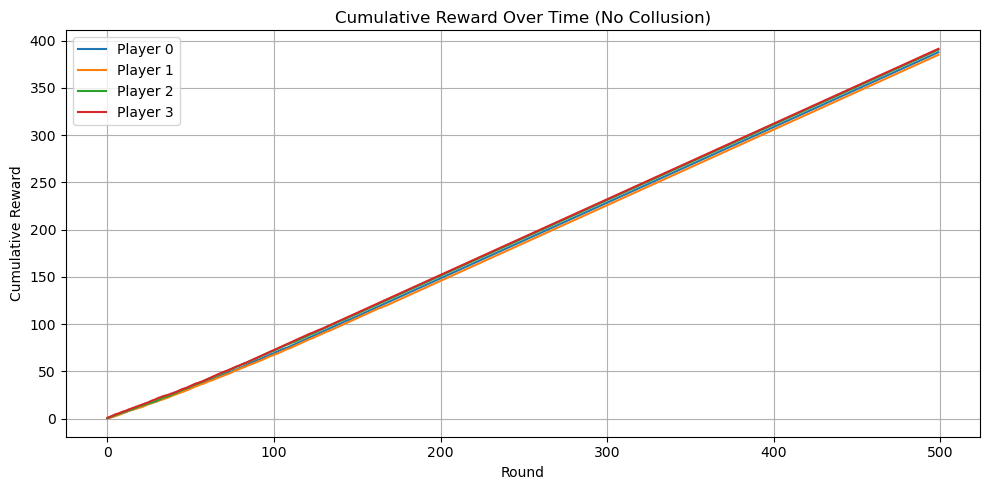

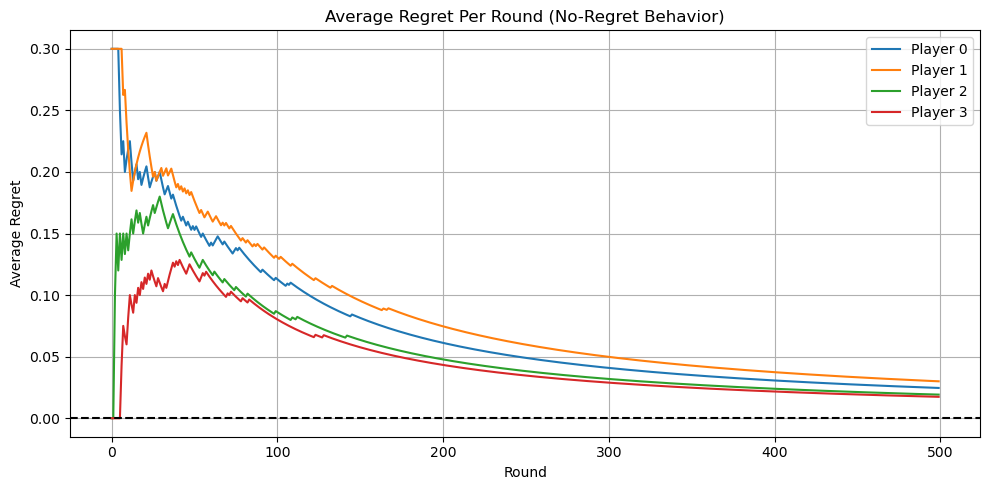

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_players = 4
num_actions = 3
num_rounds = 500
eta = 0.1  # Learning rate

# Create general sum payoff tensor: shape = (a1, a2, a3, a4, player_idx)
payoff_tensor = np.zeros((num_actions, num_actions, num_actions, num_actions, num_players))

# Example payoff rule:
# Player i gets a higher reward when they choose their preferred action (say, 0 for i=0, 1 for i=1, etc.)
for a0 in range(num_actions):
    for a1 in range(num_actions):
        for a2 in range(num_actions):
            for a3 in range(num_actions):
                joint_action = (a0, a1, a2, a3)
                payoff_tensor[joint_action][0] = 0.5 + 0.3 * (a0 == 0)
                payoff_tensor[joint_action][1] = 0.5 + 0.3 * (a1 == 1)
                payoff_tensor[joint_action][2] = 0.5 + 0.3 * (a2 == 2)
                payoff_tensor[joint_action][3] = 0.5 + 0.3 * (a3 == 0)

# Initialize Hedge weights
weights = np.ones((num_players, num_actions))
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

# Game loop
for t in range(num_rounds):
    # Convert weights to probability distributions
    probs = weights / weights.sum(axis=1, keepdims=True)

    # Sample actions
    actions = np.array([
        np.random.choice(num_actions, p=probs[i])
        for i in range(num_players)
    ])

    # Get rewards for this joint action
    rewards = payoff_tensor[tuple(actions)]

    # Update for each player
    for i in range(num_players):
        # Compute counterfactual payoffs for each possible action
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            alt_action = actions.copy()
            alt_action[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(alt_action)][i]

        # Regret = best counterfactual - actual
        regret = np.max(counterfactual_payoffs) - rewards[i]

        # Log
        history_rewards[i, t] = rewards[i]
        history_regrets[i, t] = regret

        # Hedge update
        weights[i] *= np.exp(eta * counterfactual_payoffs)

# === Plotting ===

# Cumulative Reward
plt.figure(figsize=(10, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title("Cumulative Reward Over Time (No Collusion)")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Regret
plt.figure(figsize=(10, 5))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title("Average Regret Per Round (No-Regret Behavior)")
plt.xlabel("Round")
plt.ylabel("Average Regret")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


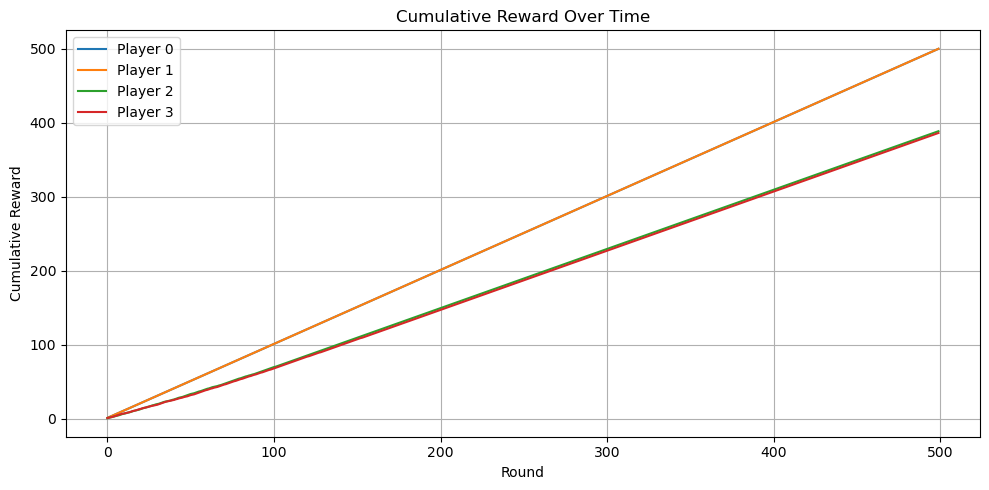

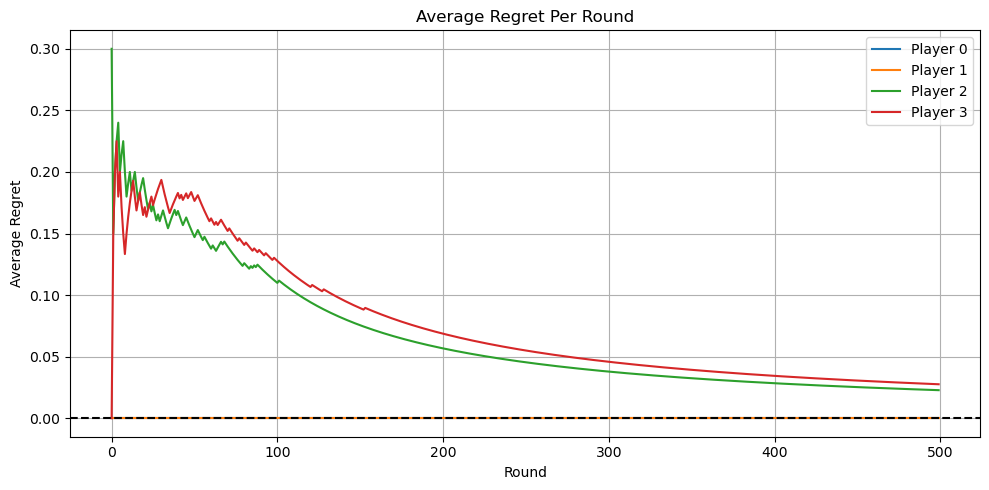

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_players = 4
num_actions = 3
num_rounds = 500
eta = 0.1

# Colluders are players 0 and 1
colluding_players = [0, 1]

# Define payoff tensor with coordinated benefit for colluders
payoff_tensor = np.zeros((num_actions, num_actions, num_actions, num_actions, num_players))

# Coordinated reward structure:
# If players 0 and 1 both pick action 2, they get a high reward.
for a0 in range(num_actions):
    for a1 in range(num_actions):
        for a2 in range(num_actions):
            for a3 in range(num_actions):
                joint_action = (a0, a1, a2, a3)
                # Collusion benefit if both play action 2
                if a0 == 2 and a1 == 2:
                    payoff_tensor[joint_action][0] = 1.0
                    payoff_tensor[joint_action][1] = 1.0
                else:
                    payoff_tensor[joint_action][0] = 0.2
                    payoff_tensor[joint_action][1] = 0.2
                # Honest players get noisy payoffs based on their own actions
                payoff_tensor[joint_action][2] = 0.5 + 0.3 * (a2 == 1)
                payoff_tensor[joint_action][3] = 0.5 + 0.3 * (a3 == 0)

# Initialize weights for Hedge
weights = np.ones((num_players, num_actions))
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

for t in range(num_rounds):
    probs = weights / weights.sum(axis=1, keepdims=True)

    # Colluding players always pick action 2
    actions = np.array([
        2 if i in colluding_players else np.random.choice(num_actions, p=probs[i])
        for i in range(num_players)
    ])

    rewards = payoff_tensor[tuple(actions)]

    for i in range(num_players):
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            counterfactual_action = actions.copy()
            counterfactual_action[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(counterfactual_action)][i]

        best_response = np.max(counterfactual_payoffs)
        regret = best_response - rewards[i]

        history_rewards[i, t] = rewards[i]
        history_regrets[i, t] = regret

        if i not in colluding_players:
            weights[i] *= np.exp(eta * counterfactual_payoffs)

# === PLOTTING ===

# Cumulative Reward Plot
plt.figure(figsize=(10, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title("Cumulative Reward Over Time")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Regret Per Round
plt.figure(figsize=(10, 5))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title("Average Regret Per Round")
plt.xlabel("Round")
plt.ylabel("Average Regret")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Colluders coordinate softly via shared Hedge weights

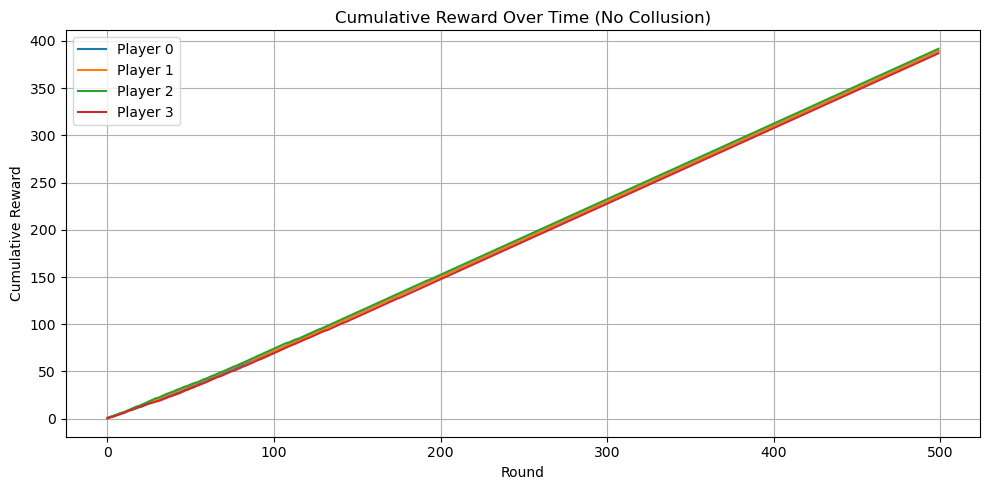

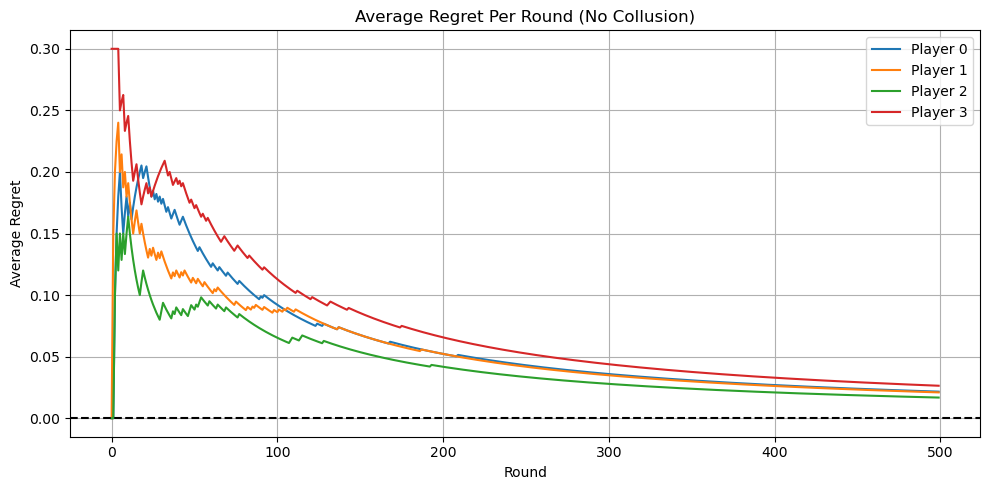

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_players = 4
num_actions = 3
num_rounds = 500
eta = 0.1

# All players are independent, no colluders
weights = np.ones((num_players, num_actions))
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

# Define payoff tensor: no collusion, just action-dependent rewards
payoff_tensor = np.zeros((num_actions, num_actions, num_actions, num_actions, num_players))
for a0 in range(num_actions):
    for a1 in range(num_actions):
        for a2 in range(num_actions):
            for a3 in range(num_actions):
                joint = (a0, a1, a2, a3)
                # Each player's reward is slightly action dependent + small noise
                payoff_tensor[joint][0] = 0.5 + 0.3 * (a0 == 2)
                payoff_tensor[joint][1] = 0.5 + 0.3 * (a1 == 1)
                payoff_tensor[joint][2] = 0.5 + 0.3 * (a2 == 0)
                payoff_tensor[joint][3] = 0.5 + 0.3 * (a3 == 2)

# Game loop
for t in range(num_rounds):
    probs = weights / weights.sum(axis=1, keepdims=True)
    actions = np.array([np.random.choice(num_actions, p=probs[i]) for i in range(num_players)])
    rewards = payoff_tensor[tuple(actions)]

    for i in range(num_players):
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            counterfactual = actions.copy()
            counterfactual[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(counterfactual)][i]

        best_response = np.max(counterfactual_payoffs)
        regret = best_response - rewards[i]

        history_rewards[i, t] = rewards[i]
        history_regrets[i, t] = regret

        weights[i] *= np.exp(eta * counterfactual_payoffs)

# === PLOTTING ===

# Cumulative Reward
plt.figure(figsize=(10, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title("Cumulative Reward Over Time (No Collusion)")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Regret
plt.figure(figsize=(10, 5))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title("Average Regret Per Round (No Collusion)")
plt.xlabel("Round")
plt.ylabel("Average Regret")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


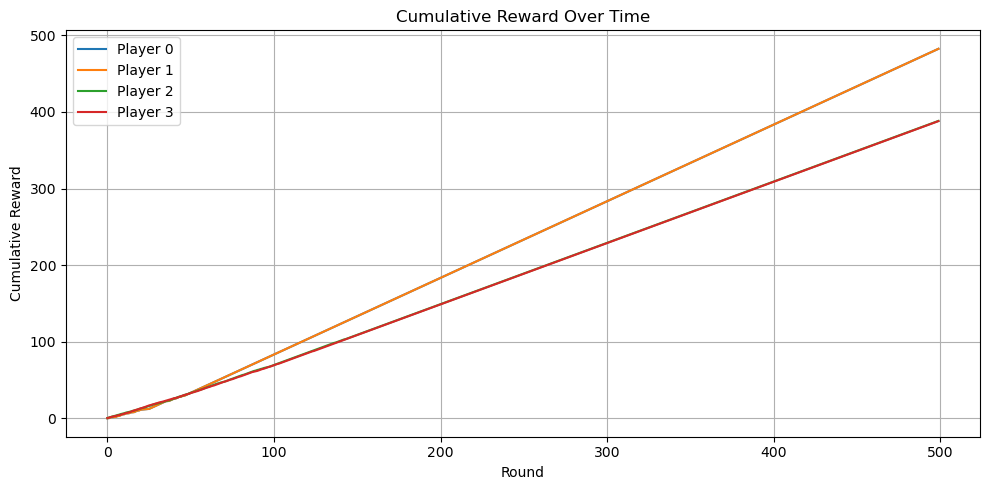

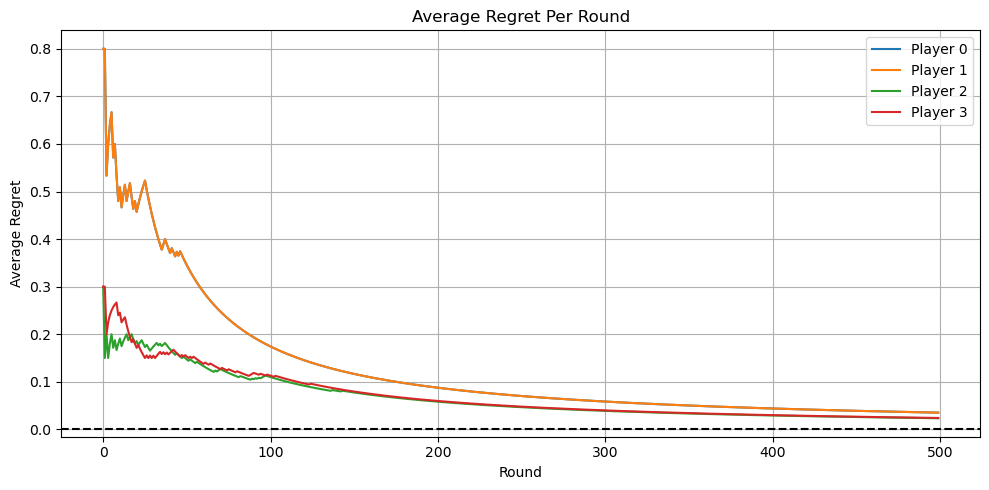

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_players = 4
num_actions = 3
num_rounds = 500
eta = 0.1

# Colluders are players 0 and 1
colluding_players = [0, 1]
honest_players = [2, 3]

# Initialize shared weights for colluders and independent weights for others
shared_colluder_weights = np.ones(num_actions)
weights = np.ones((num_players, num_actions))
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

# Define payoff tensor with coordination benefit if colluders pick same action
payoff_tensor = np.zeros((num_actions, num_actions, num_actions, num_actions, num_players))

for a0 in range(num_actions):
    for a1 in range(num_actions):
        for a2 in range(num_actions):
            for a3 in range(num_actions):
                joint = (a0, a1, a2, a3)
                # If colluders pick the same action → higher payoff
                if a0 == a1:
                    payoff_tensor[joint][0] = 1.0
                    payoff_tensor[joint][1] = 1.0
                else:
                    payoff_tensor[joint][0] = 0.2
                    payoff_tensor[joint][1] = 0.2

                # Honest players get noisy but independent payoffs
                payoff_tensor[joint][2] = 0.5 + 0.3 * (a2 == 1)
                payoff_tensor[joint][3] = 0.5 + 0.3 * (a3 == 0)

# Simulation loop
for t in range(num_rounds):
    # Convert weights to probabilities
    colluder_probs = shared_colluder_weights / shared_colluder_weights.sum()
    probs = weights / weights.sum(axis=1, keepdims=True)

    # Sample actions
    actions = np.zeros(num_players, dtype=int)
    for i in range(num_players):
        if i in colluding_players:
            actions[i] = np.random.choice(num_actions, p=colluder_probs)
        else:
            actions[i] = np.random.choice(num_actions, p=probs[i])

    # Get rewards
    rewards = payoff_tensor[tuple(actions)]

    # Loop through players for regret tracking
    for i in range(num_players):
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            counterfactual_action = actions.copy()
            counterfactual_action[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(counterfactual_action)][i]

        best_response = np.max(counterfactual_payoffs)
        regret = best_response - rewards[i]

        history_rewards[i, t] = rewards[i]
        history_regrets[i, t] = regret

        # Update weights
        if i in colluding_players:
            shared_colluder_weights *= np.exp(eta * counterfactual_payoffs)
        else:
            weights[i] *= np.exp(eta * counterfactual_payoffs)

# ==== Plotting ====

# Cumulative Reward Plot
plt.figure(figsize=(10, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title("Cumulative Reward Over Time")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Regret Per Round
plt.figure(figsize=(10, 5))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title("Average Regret Per Round")
plt.xlabel("Round")
plt.ylabel("Average Regret")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


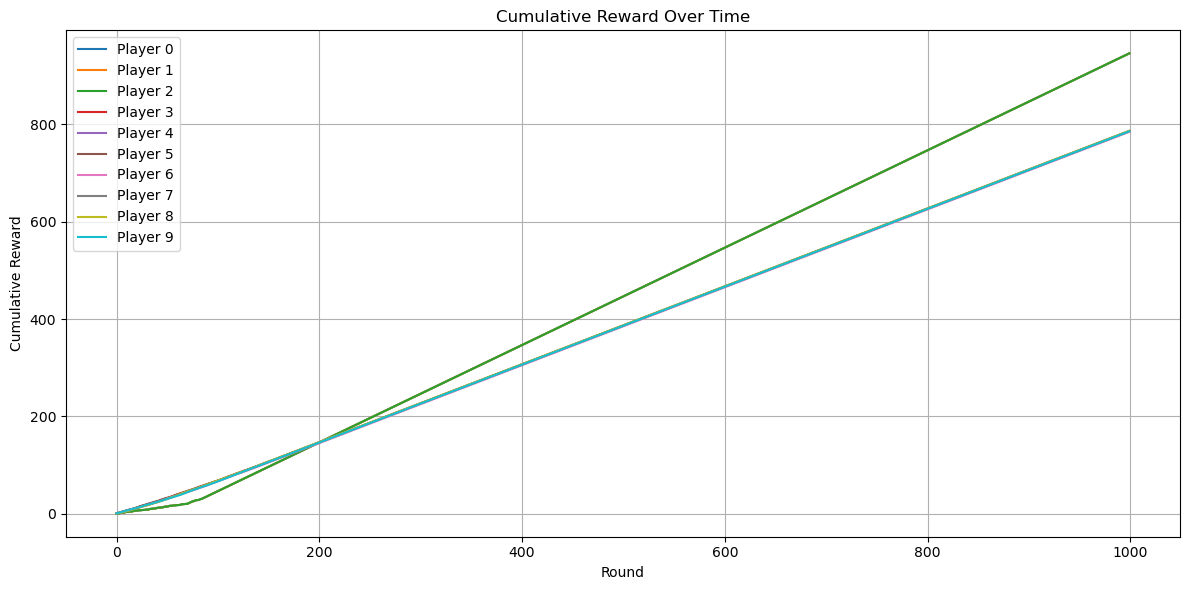

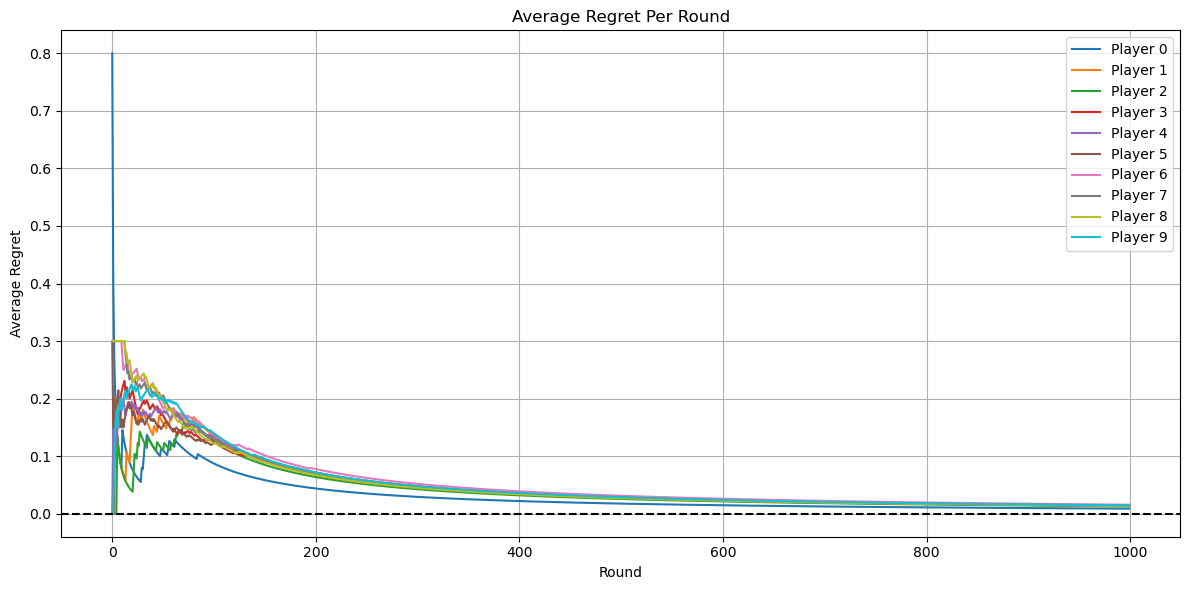

Saved history_rewards.npy and history_regrets.npy successfully!


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==== PARAMETERS ====
num_players = 10        # Total number of players (can change freely)
num_colluders = 3       # How many colluding players
num_actions = 4         # Number of actions per player
num_rounds = 1000       # How many rounds to simulate
eta = 0.1               # Hedge learning rate

# ==== INITIALIZATION ====
players = np.arange(num_players)
colluding_players = players[:num_colluders]
honest_players = players[num_colluders:]

# Initialize weights
shared_colluder_weights = np.ones(num_actions)  # Colluders share a common Hedge weight
weights = np.ones((num_players, num_actions))   # Honest players' weights

# History storage
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

# Define payoff tensor
# Shape: (action_0, action_1, ..., action_n-1, player_idx)
payoff_tensor = np.zeros([num_actions] * num_players + [num_players])

# Fill the payoff tensor
# Colluders get high reward if they all pick the SAME action
for joint_action in np.ndindex(*(num_actions for _ in range(num_players))):
    # Reward colluders if coordinated
    colluder_actions = [joint_action[i] for i in colluding_players]
    if len(set(colluder_actions)) == 1:  # all colluders pick same action
        for idx in colluding_players:
            payoff_tensor[joint_action][idx] = 1.0
    else:
        for idx in colluding_players:
            payoff_tensor[joint_action][idx] = 0.2

    # Honest players: some random (independent) payoff structures
    for idx in honest_players:
        payoff_tensor[joint_action][idx] = 0.5 + 0.3 * (joint_action[idx] == idx % num_actions)

# ==== GAME SIMULATION ====
for t in range(num_rounds):
    colluder_probs = shared_colluder_weights / shared_colluder_weights.sum()
    probs = weights / weights.sum(axis=1, keepdims=True)

    # Sample actions
    actions = np.zeros(num_players, dtype=int)
    for i in range(num_players):
        if i in colluding_players:
            actions[i] = np.random.choice(num_actions, p=colluder_probs)
        else:
            actions[i] = np.random.choice(num_actions, p=probs[i])

    rewards = payoff_tensor[tuple(actions)]

    # Update each player's weights + track regret
    for i in range(num_players):
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            counterfactual_action = actions.copy()
            counterfactual_action[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(counterfactual_action)][i]

        best_response = np.max(counterfactual_payoffs)
        regret = best_response - rewards[i]

        history_rewards[i, t] = rewards[i]
        history_regrets[i, t] = regret

        # Update based on role
        if i in colluding_players:
            shared_colluder_weights *= np.exp(eta * counterfactual_payoffs)
        else:
            weights[i] *= np.exp(eta * counterfactual_payoffs)

# ==== PLOTTING ====

# Cumulative Reward Plot
plt.figure(figsize=(12, 6))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title("Cumulative Reward Over Time")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Regret Per Round
plt.figure(figsize=(12, 6))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title("Average Regret Per Round")
plt.xlabel("Round")
plt.ylabel("Average Regret")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==== SAVE HISTORY ARRAYS ====

np.save('history_rewards.npy', history_rewards)
np.save('history_regrets.npy', history_regrets)

print("Saved history_rewards.npy and history_regrets.npy successfully!")
